In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import torch
import time
from torch import nn
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset, random_split

from scipy.io import wavfile as wav

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix




In [16]:
#data 
cancer_data = pd.read_csv("C:/Users/rhean/Documents/RHEANNE/Acads/Y4S1/SC4020/Project 2/Cancer_Data.csv")
cancer_data= cancer_data.drop(columns=["Unnamed: 32", "id"], errors="ignore")
cancer_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Building B/M Cancer Prediction Model

In [17]:
# one hot, Benign:0, Malignant:1
cancer_y = cancer_data["diagnosis"].map({"B": 0, "M": 1})
cancer_x = cancer_data.drop("diagnosis", axis = 1)

In [59]:
cancer_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
cancer_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [18]:
# split data into train test
cancer_x_trainval, cancer_x_test, cancer_y_trainval, cancer_y_test = train_test_split(cancer_x, cancer_y, test_size=0.2, random_state=42,stratify=cancer_y)

#within train val split again
cancer_x_train, cancer_x_val, cancer_y_train, cancer_y_val = train_test_split(cancer_x_trainval, cancer_y_trainval, test_size=0.25, random_state=42, stratify=cancer_y_trainval)

In [19]:
#check
print("Train:", cancer_x_train.shape, "Val:", cancer_x_val.shape, "Test:", cancer_x_test.shape)


Train: (341, 30) Val: (114, 30) Test: (114, 30)


In [20]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_x_train = scaler.fit_transform(cancer_x_train)
cancer_x_test = scaler.transform(cancer_x_test)
cancer_x_val = scaler.transform(cancer_x_val)

In [64]:
# save scaler
joblib.dump(scaler, 'cancer_scaler.joblib')

['cancer_scaler.joblib']

In [21]:
# Convert to torch tensors
cancer_x_train_tensor = torch.tensor(cancer_x_train, dtype=torch.float32)
cancer_y_train_tensor = torch.tensor(cancer_y_train, dtype=torch.float32).view(-1, 1)

cancer_x_test_tensor = torch.tensor(cancer_x_test, dtype=torch.float32)
cancer_y_test_tensor = torch.tensor(cancer_y_test.values, dtype=torch.float32).view(-1, 1)

cancer_x_val_tensor = torch.tensor(cancer_x_val, dtype=torch.float32)
cancer_y_val_tensor = torch.tensor(cancer_y_val.values, dtype=torch.float32).view(-1, 1)


# Create datasets and loaders
cancer_train_dataset = TensorDataset(cancer_x_train_tensor, cancer_y_train_tensor)
cancer_test_dataset = TensorDataset(cancer_x_test_tensor, cancer_y_test_tensor)
cancer_val_dataset = TensorDataset(cancer_x_val_tensor, cancer_y_val_tensor)

cancer_train_loader = DataLoader(cancer_train_dataset, batch_size=16, shuffle=True)
cancer_test_loader = DataLoader(cancer_test_dataset, batch_size=16, shuffle=False)
cancer_val_loader = DataLoader(cancer_val_dataset, batch_size=16, shuffle=False)



In [66]:
class MLP(nn.Module):
    
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1),
         
            )

    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu_stack(x)

In [67]:
# Instantiate model
input_dim = cancer_x_train.shape[1]
cancer_model = MLP(input_dim)

In [68]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

criterion = nn.BCEWithLogitsLoss() # binary cross-entropy
optimizer = torch.optim.Adam(cancer_model.parameters(), lr=0.001, weight_decay = 1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)

epochs = 30

train_losses, val_losses = [],[]
train_accs, val_accs = [],[]

for epoch in range(epochs):
    # Train
    cancer_model.train()
    running_loss, correct, total = 0.0, 0, 0
    for x_batch, y_batch in cancer_train_loader:
        optimizer.zero_grad()
        outputs = cancer_model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        preds = (outputs > 0.5).float()
        correct += (preds == y_batch).sum().item()
        total += y_batch.size(0)
    
    train_loss = running_loss / len(cancer_train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

  # validation

    cancer_model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for x_batch, y_batch in cancer_val_loader:
            outputs = cancer_model(x_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            preds = (outputs > 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_loss /= len(cancer_val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    scheduler.step(val_loss)


    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")



Epoch [1/30] Train Loss: 0.5929, Train Acc: 0.7801 | Val Loss: 0.5090, Val Acc: 0.8860
Epoch [2/30] Train Loss: 0.4112, Train Acc: 0.9003 | Val Loss: 0.3647, Val Acc: 0.9474
Epoch [3/30] Train Loss: 0.2930, Train Acc: 0.9179 | Val Loss: 0.2698, Val Acc: 0.9474
Epoch [4/30] Train Loss: 0.2124, Train Acc: 0.9355 | Val Loss: 0.2125, Val Acc: 0.9561
Epoch [5/30] Train Loss: 0.1759, Train Acc: 0.9355 | Val Loss: 0.1756, Val Acc: 0.9649
Epoch [6/30] Train Loss: 0.1578, Train Acc: 0.9501 | Val Loss: 0.1494, Val Acc: 0.9649
Epoch [7/30] Train Loss: 0.1347, Train Acc: 0.9472 | Val Loss: 0.1314, Val Acc: 0.9649
Epoch [8/30] Train Loss: 0.1151, Train Acc: 0.9648 | Val Loss: 0.1178, Val Acc: 0.9649
Epoch [9/30] Train Loss: 0.1035, Train Acc: 0.9677 | Val Loss: 0.1087, Val Acc: 0.9737
Epoch [10/30] Train Loss: 0.1002, Train Acc: 0.9736 | Val Loss: 0.1009, Val Acc: 0.9737
Epoch [11/30] Train Loss: 0.0909, Train Acc: 0.9707 | Val Loss: 0.0947, Val Acc: 0.9737
Epoch [12/30] Train Loss: 0.0856, Train A

In [69]:

cancer_model.eval()
y_pred = []
with torch.no_grad():
    for x_batch, _ in cancer_test_loader:
        preds = cancer_model(x_batch)
        preds = (preds > 0.5).int()
        y_pred.extend(preds.numpy())

y_pred = np.array(y_pred).flatten()
print("\nClassification Report:\n", classification_report(cancer_y_test, y_pred))
print("Test Accuracy:", accuracy_score(cancer_y_test, y_pred))





Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test Accuracy: 0.9824561403508771


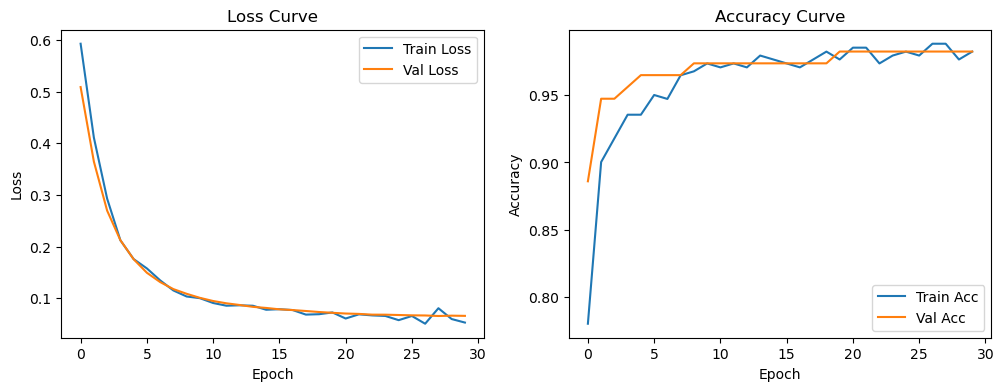

In [70]:
# check for overfitting
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


In [71]:
# save model 
torch.save(cancer_model.state_dict(), "cancer_model.pth")


In [11]:
# load model after reopen
input_dim = cancer_x_train.shape[1]
cancer_model = MLP(input_dim)  # initialize the same architecture
cancer_model.load_state_dict(torch.load("cancer_model.pth"))
cancer_model.eval() 


MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=31, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=1, bias=True)
  )
)

# Disease Prediction and Urgency Classification

In [22]:
pd.set_option("display.max_colwidth", None)  # no cutoff for long text

In [23]:
disease_data = pd.read_csv("C:/Users/rhean/Documents/RHEANNE/Acads/Y4S1/SC4020/Project 2/Disease_Data/dataset.csv")
symptom_severity = pd.read_csv("C:/Users/rhean/Documents/RHEANNE/Acads/Y4S1/SC4020/Project 2/Disease_Data/Symptom-severity.csv")
symptom_description = pd.read_csv("C:/Users/rhean/Documents/RHEANNE/Acads/Y4S1/SC4020/Project 2/Disease_Data/symptom_Description.csv")
symptom_precaution = pd.read_csv("C:/Users/rhean/Documents/RHEANNE/Acads/Y4S1/SC4020/Project 2/Disease_Data/symptom_precaution.csv")


In [7]:
disease_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [24]:
len(disease_data['Disease'].unique())

41

In [25]:
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [11]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [12]:
len(symptom_severity['Symptom'].unique())


132

In [14]:
symptom_severity['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [26]:
#investigating prognosis 
symptom_severity[symptom_severity['Symptom']=='prognosis']

,Symptom,weight
132,prognosis,5


In [27]:
# dropping prognosis
symptom_severity = symptom_severity[symptom_severity['Symptom']!='prognosis']

In [28]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  132 non-null    object
 1   weight   132 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [18]:
symptom_description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
1,Malaria,An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
2,Allergy,"An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens."
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone."
4,Psoriasis,"Psoriasis is a common skin disorder that forms thick, red, bumpy patches covered with silvery scales. They can pop up anywhere, but most appear on the scalp, elbows, knees, and lower back. Psoriasis can't be passed from person to person. It does sometimes happen in members of the same family."


In [19]:
symptom_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


Finding urgent diseases

In [42]:
symptom_precaution[symptom_precaution['Precaution_1']=='Consult nearest hospital'].head()


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
28,Hepatitis C,Consult nearest hospital,vaccination,eat healthy,medication


In [43]:
symptom_precaution['Precaution_1'].unique()


array(['stop irritation', 'Consult nearest hospital', 'apply calamine',
       'reduce stress', 'wash hands with warm soapy water',
       'avoid fatty spicy food', 'cold baths', 'acetaminophen',
       'lie down', 'lie down on side', 'bath twice', 'have balanced diet',
       'soak affected area in warm water', 'meditation',
       'drink vitamin c rich drinks', 'use neem in bathing ',
       'use heating pad or cold pack', 'eat healthy',
       'drink plenty of water', 'lie down flat and raise the leg high',
       'avoid open cuts', 'massage', 'eat high calorie vegitables',
       'consult nearest hospital', 'switch to loose cloothing',
       'stop alcohol consumption', 'drink papaya leaf juice',
       'consult doctor', 'call ambulance', 'exercise',
       'stop eating solid food for while', 'cover mouth'], dtype=object)

In [44]:
symptom_precaution[symptom_precaution['Precaution_1']=='consult nearest hospital'].head()


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
26,Hepatitis B,consult nearest hospital,vaccination,eat healthy,medication


In [45]:
symptom_precaution[symptom_precaution['Precaution_1']=='consult doctor'].head()


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
35,Hepatitis D,consult doctor,medication,eat healthy,follow up
37,Pneumonia,consult doctor,medication,rest,follow up


In [46]:
symptom_precaution[symptom_precaution['Precaution_1']=='call ambulance'].head()


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
36,Heart attack,call ambulance,chew or swallow asprin,keep calm,NaN


In [47]:
symptom_precaution['Precaution_2'].unique()
#consult nearest hospital, consult_doctor

array(['consult nearest hospital', 'avoid oily food',
       'cover area with bandage', 'exercise',
       'stop bleeding using pressure', 'avoid lying down after eating',
       'anti itch medicine', 'wash hands through',
       'avoid sudden change in body', 'check in pulse',
       'avoid fatty spicy food', 'use antibiotics', 'salt baths',
       'consume probiotic food', 'consume witch hazel', 'take vapour',
       'consume neem leaves', 'massage', 'increase vitamin c intake',
       'use oinments', 'wear ppe if possible', 'eat healthy',
       'antiboitic therapy', 'vaccination',
       'use detol or neem in bathing water', 'reduce stress',
       'take deep breaths', 'consult doctor', 'consume milk thistle',
       'rest', 'medication', 'chew or swallow asprin',
       'use hot and cold therapy', 'try taking small sips of water'],
      dtype=object)

In [52]:
symptom_precaution[symptom_precaution['Precaution_2']=='check in pulse'].head()


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
10,Hypoglycemia,lie down on side,check in pulse,drink sugary drinks,consult doctor


In [48]:
symptom_precaution['Precaution_3'].unique()


array(['stop taking drug', 'avoid non veg food', nan, 'eat healthy',
       'consult doctor', 'maintain healthy weight',
       'avoid fatty spicy food', 'follow up', 'avoid abrupt head movment',
       'drink sugary drinks', 'drink plenty of water',
       'remove scabs with wet compressed cloth', 'reduce stress',
       'eliminate milk', 'warm bath with epsom salt', 'avoid cold food',
       'take vaccine', 'take otc pain reliver', 'use lemon balm',
       'drink cranberry juice', 'use vein compression', 'exercise',
       'keep infected area dry', 'use poloroid glasses in sun',
       'get away from trigger', 'medication',
       'eat fruits and high fiberous food', 'keep mosquitos away',
       'keep calm', 'rest', 'try acupuncture'], dtype=object)

In [49]:
symptom_precaution['Precaution_4'].unique()


array(['follow up', 'keep mosquitos out', 'use ice to compress itching',
       'get proper sleep', 'salt baths', 'exercise', 'eat healthy',
       'medication', 'relax', 'consult doctor', 'avoid too many products',
       'limit alcohol', 'consume alovera juice', 'keep fever in check',
       'avoid public places', 'take radioactive iodine treatment',
       'take probiotics', 'dont stand still for long', 'use clean cloths',
       'seek help', 'keep hydrated', nan, 'massage',
       'ease back into eating', 'rest'], dtype=object)

In [29]:
urgent_precautions = ['Consult nearest hospital','consult nearest hospital', 'consult doctor', 'call ambulance', 'seek help']
# filter out urgent diseases 


# check across all precaution columns
mask = symptom_precaution[['Precaution_1','Precaution_2','Precaution_3','Precaution_4']].isin(urgent_precautions).any(axis=1)

# filter the dataframe
urgent_df = symptom_precaution[mask]

print(urgent_df)
len(urgent_df)
 

                         Disease                      Precaution_1  \
0                  Drug Reaction                   stop irritation   
1                        Malaria          Consult nearest hospital   
4                      Psoriasis  wash hands with warm soapy water   
6            Chronic cholestasis                        cold baths   
7                    hepatitis A          Consult nearest hospital   
8                Osteoarthristis                     acetaminophen   
10                  Hypoglycemia                  lie down on side   
12                     Diabetes                 have balanced diet   
13                      Impetigo  soak affected area in warm water   
19          Cervical spondylosis      use heating pad or cold pack   
23                          AIDS                   avoid open cuts   
24  Paralysis (brain hemorrhage)                           massage   
25                       Typhoid       eat high calorie vegitables   
26                  

23

In [22]:
urgent_diseases = urgent_df['Disease']
print(urgent_diseases)

0                    Drug Reaction
1                          Malaria
4                        Psoriasis
6              Chronic cholestasis
7                      hepatitis A
8                  Osteoarthristis
10                    Hypoglycemia
12                       Diabetes 
13                        Impetigo
19            Cervical spondylosis
23                            AIDS
24    Paralysis (brain hemorrhage)
25                         Typhoid
26                     Hepatitis B
28                     Hepatitis C
29                        Migraine
30                Bronchial Asthma
31             Alcoholic hepatitis
33                     Hepatitis E
35                     Hepatitis D
36                    Heart attack
37                       Pneumonia
40                    Tuberculosis
Name: Disease, dtype: object


In [30]:
urgent_precautions = ['Consult nearest hospital','consult nearest hospital', 'consult doctor', 'call ambulance']
# filter out urgent diseases 

# check across all precaution columns
mask = symptom_precaution['Precaution_1'].isin(urgent_precautions)

# filter the dataframe
urgent_df = symptom_precaution[mask]


print(urgent_df)

         Disease              Precaution_1            Precaution_2  \
1        Malaria  Consult nearest hospital         avoid oily food   
7    hepatitis A  Consult nearest hospital      wash hands through   
26   Hepatitis B  consult nearest hospital             vaccination   
28   Hepatitis C  Consult nearest hospital             vaccination   
35   Hepatitis D            consult doctor              medication   
36  Heart attack            call ambulance  chew or swallow asprin   
37     Pneumonia            consult doctor              medication   

              Precaution_3        Precaution_4  
1       avoid non veg food  keep mosquitos out  
7   avoid fatty spicy food          medication  
26             eat healthy          medication  
28             eat healthy          medication  
35             eat healthy           follow up  
36               keep calm                 NaN  
37                    rest           follow up  


## Preprocess

In [56]:

# get all symptoms
symptom_cols = [col for col in disease_data.columns if col.startswith("Symptom")]

#fillna
disease_data[symptom_cols] = disease_data[symptom_cols].fillna("None")


all_symptoms = set()
for col in symptom_cols:
    all_symptoms.update(disease_data[col].unique())
all_symptoms.discard("None") 
all_symptoms = sorted(list(all_symptoms))
print(f"Unique symptoms: {len(all_symptoms)}")
# symptom severity has 132 symptoms, should match


Unique symptoms: 131


In [57]:

symptoms_encoded = pd.DataFrame(0, index=disease_data.index, columns=all_symptoms)

for idx, row in disease_data.iterrows():
    for col in symptom_cols:
        symptom = row[col]
        if symptom != "None" and symptom in symptoms_encoded.columns:
            symptoms_encoded.at[idx, symptom] = 1

print(symptoms_encoded.shape)   # should be (n_samples, n_symptoms)

(4920, 131)


In [58]:
symptoms_encoded.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# find missing symptom
raw_symptoms_set = set(symptom_severity['Symptom'].unique())
encoded_symptoms_set = set(symptoms_encoded.columns)

# Find mismatches
missing_in_encoding = raw_symptoms_set - encoded_symptoms_set
extra_in_encoding   = encoded_symptoms_set - raw_symptoms_set

print("Missing in encoding:", missing_in_encoding)
print("Extra in encoding:", extra_in_encoding)

Missing in encoding: {'yellowish_skin', 'irregular_sugar_level', 'extra_marital_contacts', 'swollen_legs', 'indigestion', 'puffy_face_and_eyes', 'blackheads', 'fatigue', 'dizziness', 'redness_of_eyes', 'dark_urine', 'receiving_unsterile_injections', 'belly_pain', 'congestion', 'muscle_wasting', 'bruising', 'restlessness', 'polyuria', 'irritation_in_anus', 'weakness_of_one_body_side', 'anxiety', 'loss_of_smell', 'irritability', 'coma', 'fast_heart_rate', 'yellowing_of_eyes', 'yellow_crust_ooze', 'inflammatory_nails', 'chills', 'headache', 'phlegm', 'drying_and_tingling_lips', 'watering_from_eyes', 'hip_joint_pain', 'high_fever', 'palpitations', 'mild_fever', 'increased_appetite', 'stiff_neck', 'altered_sensorium', 'movement_stiffness', 'blood_in_sputum', 'blurred_and_distorted_vision', 'small_dents_in_nails', 'malaise', 'cough', 'sinus_pressure', 'muscle_pain', 'cramps', 'painful_walking', 'knee_pain', 'dischromic_patches', 'rusty_sputum', 'diarrhoea', 'stomach_pain', 'skin_rash', 'pain

In [60]:
import re
def normalize_symptom_name(s: str) -> str:
    """
    Normalize symptom strings to ensure consistency across files.
    - Lowercase
    - Replace spaces, hyphens with underscores
    - Collapse multiple underscores
    - Strip leading/trailing underscores
    """
    s = s.strip().lower()
    s = re.sub(r'[\s\-]+', '_', s)       # replace spaces and hyphens with underscores
    s = re.sub(r'_+', '_', s)            # collapse multiple underscores
    s = s.strip('_')                     # remove leading/trailing underscores
    return s

In [61]:
# clean both sources
symptom_severity['Symptom'] = symptom_severity['Symptom'].apply(normalize_symptom_name)
symptoms_encoded.columns = [normalize_symptom_name(c) for c in symptoms_encoded.columns]

# sets for comparison
raw_symptom_set = set(symptom_severity['Symptom'].unique()) - {'prognosis'}  # drop prognosis
encoded_symptom_set = set(symptoms_encoded.columns)

print("After cleaning:")
print("Missing in encoding:", raw_symptom_set - encoded_symptom_set)
print("Extra in encoding:", encoded_symptom_set - raw_symptom_set)


After cleaning:
Missing in encoding: set()
Extra in encoding: set()


In [67]:
print(list(symptoms_encoded.columns))

['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of_urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irritation_in_anus', 'joi

In [76]:
#encode values
from sklearn.preprocessing import LabelEncoder

# Target
le = LabelEncoder()
disease_encoded = le.fit_transform(disease_data["Disease"])


In [75]:
print(disease_encoded)

[15 15 15 ... 38 35 27]


In [77]:
joblib.dump(le, 'task3_models\disease_encoder.joblib')

['task3_models\\disease_encoder.joblib']

In [25]:
# check
symptom_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


## Modelling

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

symptoms_train, symptoms_test, disease_train, disease_test = train_test_split(symptoms_encoded, disease_encoded, test_size=0.2, stratify=disease_encoded, random_state=42)

print("Train shape:", symptoms_train.shape)
print("Test shape:", symptoms_test.shape)


Train shape: (3936, 131)
Test shape: (984, 131)


In [71]:

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(symptoms_train, disease_train)

print("Test Accuracy:", clf.score(symptoms_test, disease_test))

Test Accuracy: 1.0


In [72]:
train_acc = clf.score(symptoms_train, disease_train)
test_acc = clf.score(symptoms_test, disease_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 1.0


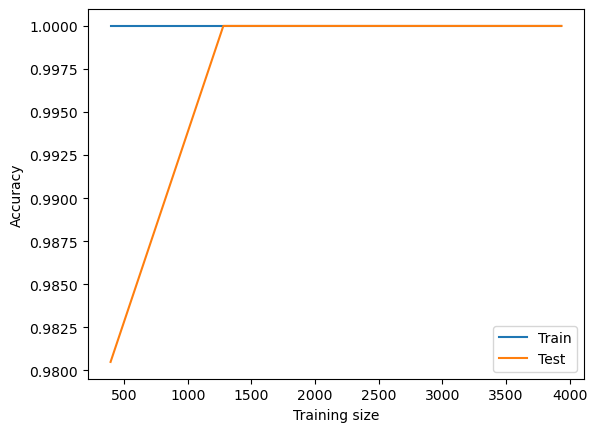

In [73]:
# hchecking for overfitting
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    clf, symptoms_encoded, disease_encoded, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [58]:
# save model


# Save model and supporting objects
joblib.dump(clf, "disease_classifier.pkl")
joblib.dump(all_symptoms, "all_symptoms.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [13]:
#to load clf model
# Load everything back
clf = joblib.load("task3_models/disease_classifier.pkl")
all_symptoms = joblib.load("task3_models/all_symptoms.pkl")
le = joblib.load(r"task3_models/symptom_encoder.joblib")


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(symptoms_test)
print(classification_report(disease_test, y_pred))
print(confusion_matrix(disease_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        24
          17       1.00    

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
estimator = clf.estimators_[0]

# Print the tree structure in text
print(tree.export_text(estimator, feature_names=list(symptoms_train.columns)))

|--- internal_itching <= 0.50
|   |--- continuous_feel_of_urine <= 0.50
|   |   |--- irritability <= 0.50
|   |   |   |--- toxic_look_(typhos) <= 0.50
|   |   |   |   |--- spotting_urination <= 0.50
|   |   |   |   |   |--- increased_appetite <= 0.50
|   |   |   |   |   |   |--- yellow_crust_ooze <= 0.50
|   |   |   |   |   |   |   |--- pain_behind_the_eyes <= 0.50
|   |   |   |   |   |   |   |   |--- fast_heart_rate <= 0.50
|   |   |   |   |   |   |   |   |   |--- receiving_unsterile_injections <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- dischromic_patches <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |   |   |   |   |   |   |--- dischromic_patches >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 15.0
|   |   |   |   |   |   |   |   |   |--- receiving_unsterile_injections >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 19.0
|   |   |   |   |   |   |   |   |--- fast_heart_rate >  0.50
|   |   | 

# Use model

In [23]:
import numpy as np

def predict_disease(symptoms_list, model, all_symptoms, label_encoder, top_k=3):

    input_vector = np.zeros(len(all_symptoms))
    
    for symptom in symptoms_list:
        if symptom in all_symptoms:
            idx = all_symptoms.index(symptom)
            input_vector[idx] = 1
    

    input_vector = input_vector.reshape(1, -1)
    

    probs = model.predict_proba(input_vector)[0]
    

    top_indices = np.argsort(probs)[::-1][:top_k]

    results = [(label_encoder.inverse_transform([i])[0], probs[i]) for i in top_indices]
    
    
    
    
    return results


In [24]:
def assess_urgency(user_symptoms, symptom_severity):
    """
    Calculate urgency score based on symptom severity.
    """
    # Create dictionary for quick lookup
    severity_dict = dict(zip(symptom_severity['Symptom'], symptom_severity['weight']))

    # Get severity scores for input symptoms
    scores = [severity_dict[s] for s in user_symptoms if s in severity_dict]

    if not scores:
        return "No matching symptoms found.", 0

    total_score = sum(scores)


    return total_score



# add function to pull disease description 

In [25]:
def disease_urgency(results, total_score, urgent_diseases):
    # take top probability disease 
    
    top_disease = results[0][0]
    
    # Define thresholds
    if (total_score <= 18.65) & (top_disease not in (urgent_diseases)):
        urgency = "Low urgency"
    elif (total_score <= 26.05) & (top_disease not in (urgent_diseases)):
        urgency = "Moderate urgency"
    elif total_score>= 26.05 or top_disease.isin(urgent_diseases):
        urgency = "High urgency"
        
        
    return urgency, total_score

In [26]:
user_symptoms = ["itching", "skin_rash", "nodal_skin_eruptions", "dischromic_patches"]

predictions = predict_disease(user_symptoms, clf, all_symptoms, le, top_k=3)
score = assess_urgency(user_symptoms, symptom_severity)
urgency,final_score= disease_urgency(predictions, score, urgent_diseases)
print("Predicted diseases:")
for disease, prob in predictions:
    print(f"{disease}: {prob:.2f}")

print(f"Urgency: {urgency} (Score = {final_score})")


Predicted diseases:
Fungal infection: 0.34
Drug Reaction: 0.12
Dimorphic hemmorhoids(piles): 0.08
Urgency: Low urgency (Score = 14)


C:\Users\rhean\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
import numpy as np
import pandas as pd

def predict_disease(symptoms_list, model, all_symptoms, label_encoder, top_k=3):
    input_vector = np.zeros(len(all_symptoms))
  
    for symptom in symptoms_list:
        if symptom in all_symptoms:
            idx = all_symptoms.index(symptom)
            input_vector[idx] = 1
    
    input_vector = input_vector.reshape(1, -1)  
    probs = model.predict_proba(input_vector)[0]  

    
    top_indices = np.argsort(probs)[::-1][:top_k]
    results = [(label_encoder.inverse_transform([i])[0], probs[i]) for i in top_indices]
    
    return results


def assess_urgency(user_symptoms, symptom_severity):
    severity_dict = dict(zip(symptom_severity['Symptom'], symptom_severity['weight']))
    
    # Get severity scores for input symptoms
    scores = [severity_dict[s] for s in user_symptoms if s in severity_dict]

    if not scores:
        return "No matching symptoms found.", 0

    total_score = sum(scores)
    return total_score






In [29]:
# Function to classify disease urgency based on top predicted disease and symptom severity
def disease_urgency(results, total_score, urgent_diseases, low_thresh=18.65, high_thresh=26.05):
    top_disease = results[0][0]  # Extract disease name from top prediction
    
    # If disease is in the urgent diseases list, set as high urgency
    if top_disease in urgent_diseases or total_score >= high_thresh:
        return "High urgency", total_score
    elif total_score >= low_thresh:
        return "Moderate urgency", total_score
    else:
        return "Low urgency", total_score

In [30]:
# Main function to put it all together
def triage_system(user_symptoms, clf, all_symptoms, le, symptom_severity, urgent_diseases, top_k=3):
    # Predict diseases
    predictions = predict_disease(user_symptoms, clf, all_symptoms, le, top_k)
    
    # Calculate severity score
    score = assess_urgency(user_symptoms, symptom_severity)
    
    # Determine urgency level based on predicted disease and severity
    urgency, final_score = disease_urgency(predictions, score, urgent_diseases)
    
    # Output results
    print("Predicted diseases:")
    for disease, prob in predictions:
        print(f"{disease}: {prob:.2f}")
    
    print(f"Urgency: {urgency} (Score = {final_score})")



In [31]:
# Example usage
user_symptoms = ["itching", "skin_rash", "nodal_skin_eruptions", "dischromic_patches"]
urgent_diseases = ['Heart attack', 'AIDS', 'Typhoid', 'Pneumonia']  # Example urgent diseases

triage_system(user_symptoms, clf, all_symptoms, le, symptom_severity, urgent_diseases, top_k=3)

Predicted diseases:
Fungal infection: 0.34
Drug Reaction: 0.12
Dimorphic hemmorhoids(piles): 0.08
Urgency: Low urgency (Score = 14)


C:\Users\rhean\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Streamlit 

## Additional EDA

In [87]:
symptom_severity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  131 non-null    object
 1   weight   131 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [88]:
symptoms_encoded.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Sort symptom severity alphabetically
symptom_severity_sorted = symptom_severity[symptom_severity['Symptom']!='prognosis'].sort_values("Symptom")

# Ensure encoded columns match order
symptoms_encoded_Ordered = symptoms_encoded[symptom_severity_sorted["Symptom"]]

In [31]:
weights = symptom_severity_sorted["weight"].values  # shape (131,)
weights.shape

(131,)

In [32]:
# symptoms_encoded: (4920, 131)
# weights: (131,)
# Result: (4920,) → severity score per row
severity_scores = symptoms_encoded.values.dot(weights)


In [33]:
disease_data["severity_score"] = severity_scores
disease_severity = disease_data.groupby("Disease")["severity_score"].mean().reset_index()


In [34]:
print(disease_severity)

                                    Disease  severity_score
0   (vertigo) Paroymsal  Positional Vertigo           17.00
1                                      AIDS           17.45
2                                      Acne           12.75
3                       Alcoholic hepatitis           29.45
4                                   Allergy           12.60
5                                 Arthritis           22.80
6                          Bronchial Asthma           27.15
7                      Cervical spondylosis           18.65
8                               Chicken pox           37.30
9                       Chronic cholestasis           20.90
10                              Common Cold           70.45
11                                   Dengue           42.50
12                                Diabetes            41.35
13             Dimorphic hemmorhoids(piles)           22.80
14                            Drug Reaction           21.75
15                         Fungal infect

In [35]:
disease_severity.describe()

,severity_score
count,41.000000
mean,29.554878
std,14.418598
min,12.600000
25%,18.650000
50%,26.050000
75%,38.700000
max,70.450000


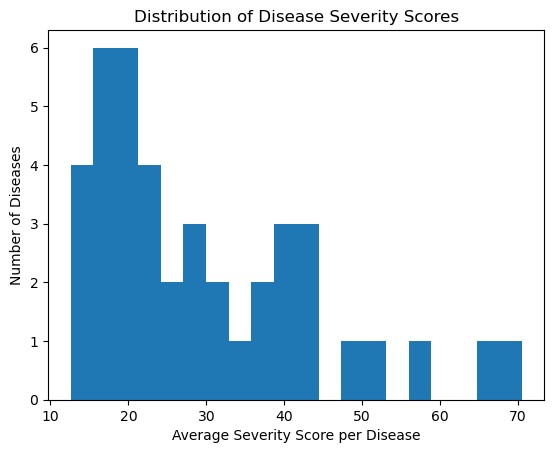

In [97]:
import matplotlib.pyplot as plt
plt.hist(disease_severity["severity_score"], bins=20)
plt.xlabel("Average Severity Score per Disease")
plt.ylabel("Number of Diseases")
plt.title("Distribution of Disease Severity Scores")
plt.show()
